In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
years = pd.read_csv('years.csv')

In [3]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.dtypes

year                         int64
per capita income (US$)    float64
dtype: object

In [5]:
years.dtypes

year    int64
dtype: object

In [6]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [7]:
years.isnull().sum()

year    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [9]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    27 non-null     int64
dtypes: int64(1)
memory usage: 344.0 bytes


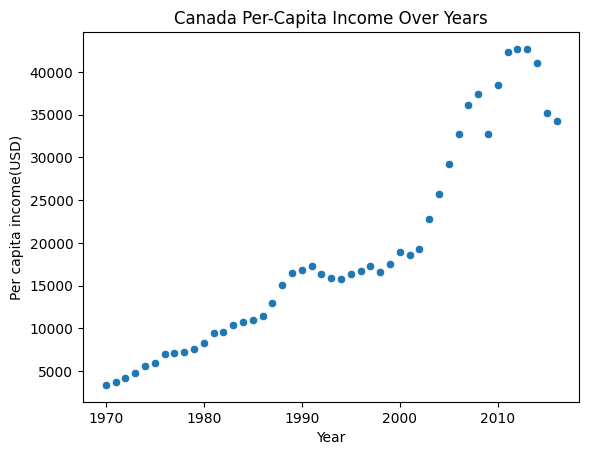

In [10]:
sns.scatterplot(x='year', y='per capita income (US$)', data=df)
plt.title("Canada Per-Capita Income Over Years")
plt.xlabel("Year")
plt.ylabel("Per capita income(USD)")
plt.show()

In [11]:
X = df[['year']]
y = df['per capita income (US$)']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [13]:
x_test

,year
44,2014
7,1977
42,2012
9,1979
5,1975
16,1986
34,2004
20,1990
0,1970
18,1988


In [14]:
reg = LinearRegression()

In [15]:
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(x_test)
y_pred

array([35628.32809393,  5413.57336174, 33995.0981084 ,  7046.80334726,
        3780.34337622, 12763.1082966 , 27462.17816631, 16029.56826764,
        -302.73158759, 14396.33828212])

In [17]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})

,y_test,y_predict
44,41039.893600,35628.328094
7,7100.126170,5413.573362
42,42665.255970,33995.098108
9,7602.912681,7046.803347
5,5998.144346,3780.343376
16,11482.891530,12763.108297
34,25719.147150,27462.178166
20,16838.673200,16029.568268
0,3399.299037,-302.731588
18,15080.283450,14396.338282


In [18]:
reg.coef_

array([816.61499276])

In [19]:
reg.intercept_

-1609034.2673283364

In [20]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE: 13203361.230221072
R2 Score:  0.9280207976779121
RMSE: 3633.6429695583843


In [21]:
years_pred = years.dropna().copy()
years_pred['per capita income (US$)'] = reg.predict(years_pred[['year']])

In [22]:
years_pred.to_csv("prediction.csv", index=False)